In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

np.random.seed(42)

# Load the graph

In [2]:
# beta should be higher than c
n = 100 # number of nodes - 585 similar to c elegans
p = 0  # number of neighbouts to take into account
c = 1e-3 # numerator
beta = 1 # denominator
threshold = 0.5
sigma = 1.0 # from the normal DEPRECATED
n_iteration = 50
warm_up  = 2 # original 5

################################################

params_dict = {
    "n": n,
    "p": p,
    "c": c,
    "beta": beta,
    "threshold": threshold,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [3]:
ut  = utils.GraphUtils()

graphs, spectra = ut.loading_graph_artifacts(params_dict)

# Estimation

In [4]:
g = graphs[-1]
s = spectra[-1]

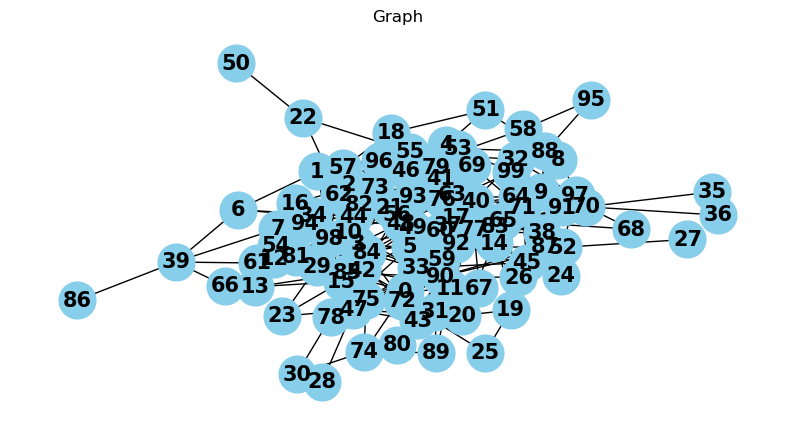

In [5]:
ut.plot_graph_from_adjacency(g, pos=None, title='Graph', size=(10,5))

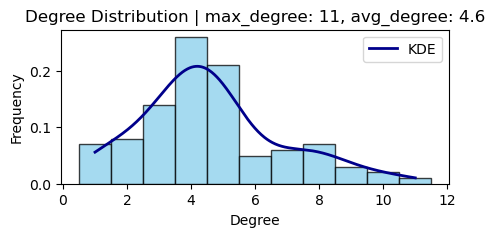

In [6]:
ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))

In [7]:
initial_guess = [1, 1]
est = estimator.LogisticModelEstimator(g)
c1,beta1 = est.estimate_parameters(initial_guess=initial_guess)

Current parameters: c=0.9790370244584012, beta=1.9997802526837796
Current loss: 125.40881460529512

Current parameters: c=0.8483491005401685, beta=2.0761822978124735
Current loss: 122.40268527791547

Current parameters: c=0.1878840037297126, beta=2.0287835637835596
Current loss: 116.05873050739999

Current parameters: c=0.05027985684393791, beta=1.961535395607588
Current loss: 115.9351996722732

Current parameters: c=0.08061982773471733, beta=1.9776603518440752
Current loss: 115.92581356918613

Current parameters: c=0.07865972355606722, beta=1.976092114080559
Current loss: 115.92576246006568

Current parameters: c=0.07791091598802583, beta=1.9726094782700334
Current loss: 115.92573782161784

Current parameters: c=0.07647612748451886, beta=1.9590329233691146
Current loss: 115.92564570882706

Current parameters: c=0.0649615504069588, beta=1.8176883107087558
Current loss: 115.92540617105186

Current parameters: c=0.06826076315876367, beta=1.8338175154021992
Current loss: 115.9249442608794

In [8]:
initial_guess = [1,1]
est2 = estimator.MLEGraphModelEstimator(g)
c2,beta2 = est2.estimate_parameters(initial_guess=initial_guess)

Current parameters: c=1.0749999999999997, beta=0.8999999999999999
Current loss: -968.9640471504323

Current parameters: c=1.1875, beta=0.8499999999999996
Current loss: -1003.6764426361775

Current parameters: c=1.2937499999999997, beta=0.6249999999999991
Current loss: -1121.7278140215526

Current parameters: c=1.40625, beta=0.5749999999999988
Current loss: -1214.1324576492182



/Users/maruanottoni/home/master/research/logit_graph/notebooks/../src/estimator.py:77: RuntimeWarning: invalid value encountered in log
  likelihood += np.log(1 - p_ij + 1e-9)


Current parameters: c=1.40625, beta=0.5749999999999988
Current loss: -1214.1324576492182

Current parameters: c=1.43125, beta=0.47499999999999865
Current loss: -1358.4487063684635

Current parameters: c=1.43125, beta=0.47499999999999865
Current loss: -1358.4487063684635

Current parameters: c=1.43125, beta=0.47499999999999865
Current loss: -1358.4487063684635

Current parameters: c=1.4124999999999996, beta=0.44999999999999885
Current loss: -1381.5385900823107

Current parameters: c=1.4124999999999996, beta=0.44999999999999885
Current loss: -1381.5385900823107

Current parameters: c=1.4124999999999996, beta=0.44999999999999885
Current loss: -1381.5385900823107

Current parameters: c=1.4304687499999997, beta=0.4406249999999987
Current loss: -1450.3146497517416

Current parameters: c=1.4117187499999995, beta=0.4156249999999989
Current loss: -1506.2141412321137

Current parameters: c=1.4117187499999995, beta=0.4156249999999989
Current loss: -1506.2141412321137

Current parameters: c=1.4117

In [130]:
print(c1,beta1)
print(c2,beta2)
print(c,beta)

0.023434330334371103 0.0
1.378743696576151 0.37874369519740797
2.0 2.0


In [131]:
est2.likelihood_function([c2, beta2]), est2.likelihood_function([c, beta])

(-2608.14794211542, -976.6052724041266)

/Users/maruanottoni/home/master/research/logit_graph/notebooks/../src/estimator.py:77: RuntimeWarning: invalid value encountered in log
  likelihood += np.log(1 - p_ij + 1e-9)


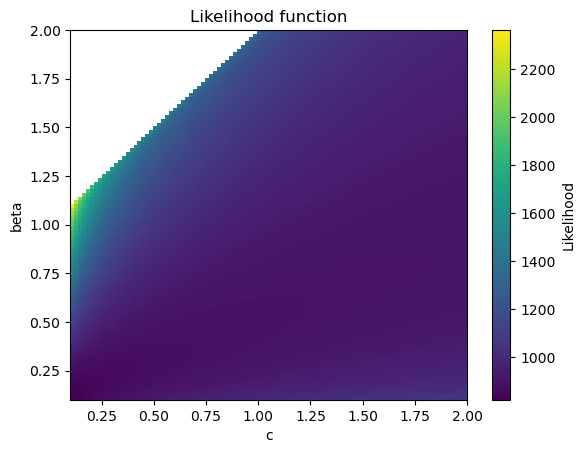

In [107]:
import numpy as np
import matplotlib.pyplot as plt

c_values = np.linspace(0.1, 2, 100)
beta_values = np.linspace(0.1, 2, 100)

likelihood = np.empty((len(c_values), len(beta_values)))
for i, ci in enumerate(c_values):
    for j, betaj in enumerate(beta_values):
        likelihood[i, j] = est2.likelihood_function([ci, betaj])


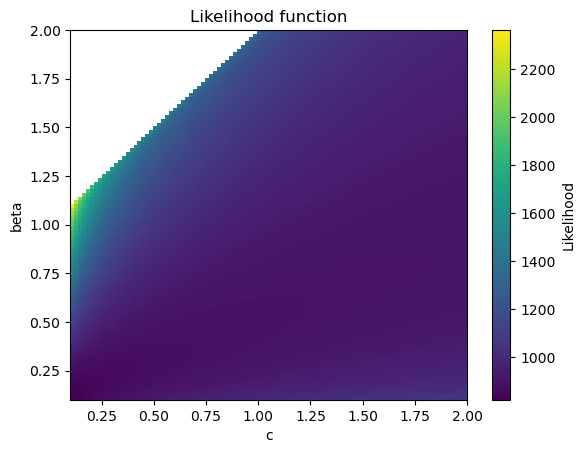

In [127]:
plt.imshow(likelihood, origin='lower', extent=[c_values[0], c_values[-1], beta_values[0], beta_values[-1]], aspect='auto')
plt.colorbar(label='Likelihood')
plt.xlabel('c')
plt.ylabel('beta')
plt.title('Likelihood function')
plt.show()